In [4]:
import numpy as np
import matplotlib.pyplot as plt
from magnificat.drw_dataset import DRWDataset
from magnificat.samplers.dc2_sampler import DC2Sampler

%matplotlib inline

# Visualize DRWDataset

__Author:__ Ji Won Park (@jiwoncpark)

__Created:__ 8/09/2021

__Last run:__ 8/09/2021

We generate the dataset of DRW light curves in ugrizy.

In [5]:
bandpasses = list('ugrizy')
train_params = [f'tau_{bp}' for bp in bandpasses]
train_params += [f'SF_inf_{bp}' for bp in bandpasses]
train_params += ['BH_mass', 'M_i', 'redshift']
train_params += [f'mag_{bp}' for bp in bandpasses]
log_params = [True for bp in bandpasses]
log_params += [True for bp in bandpasses]
log_params += [False, False, False]
log_params += [False for bp in bandpasses]
n_pointings = 100

train_seed = 123
train_cat_idx = np.arange(5)  # 11227
train_dataset = DRWDataset(DC2Sampler(train_seed, bandpasses, train_cat_idx),
                           out_dir='train_drw',
                           num_samples=len(train_cat_idx),
                           seed=train_seed,
                           n_pointings_init=n_pointings,
                           is_training=True,
                           shift_x=0.0,  # -3650*0.5,
                           rescale_x=1.0,  # 1.0/(3650*0.5)*4.0,
                           err_y=0.01)
train_dataset.slice_params = [train_dataset.param_names.index(n) for n in train_params]
train_dataset.log_params = log_params
train_dataset.get_normalizing_metadata(set_metadata=True)
print(train_dataset.slice_params)
print(train_dataset.mean_params, train_dataset.std_params)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 79.13it/s]


89 pointings were available.
Trimmed MJD has 1606 out of 3650 days.


y, params: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:05<00:00,  1.00s/it]

[15, 16, 17, 18, 19, 20, 2, 3, 4, 5, 6, 7, 0, 1, 14, 8, 9, 10, 11, 12, 13]
tensor([ 2.4158e+00,  2.4363e+00,  2.4560e+00,  2.4708e+00,  2.4816e+00,
         2.4901e+00,  1.4619e-01,  9.0335e-02,  3.6804e-02, -3.6383e-03,
        -3.3189e-02, -5.6285e-02,  7.6478e+00, -1.6543e+01,  3.4330e-01,
         2.5386e+01,  2.5371e+01,  2.5181e+01,  2.5008e+01,  2.4533e+01,
         2.4565e+01], dtype=torch.float64) tensor([0.2313, 0.2327, 0.2341, 0.2352, 0.2359, 0.2365, 0.1273, 0.1274, 0.1273,
        0.1273, 0.1274, 0.1273, 0.3921, 1.0690, 0.0451, 1.1902, 1.1797, 1.2005,
        1.2010, 1.2202, 1.1840], dtype=torch.float64)


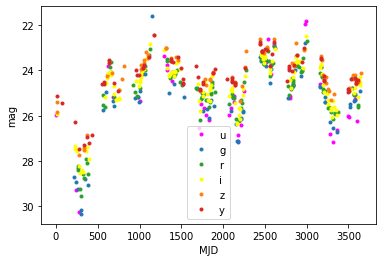

In [15]:
data = train_dataset[0]
color_dict = dict(zip(list('ugrizy'), ['magenta', 'tab:blue', 'tab:green', 'yellow', 'tab:orange', 'tab:red']))
for bp_i, bp in zip(train_dataset.bandpasses_int, train_dataset.bandpasses):
    plt.plot((data['x'])[data['trimmed_mask'][:, bp_i]].numpy(), 
             (data['y'])[data['trimmed_mask'][:, bp_i], bp_i].numpy(), 
             marker='.', linewidth=0, color=color_dict[bp], label=bp)
plt.gca().invert_yaxis()
plt.xlabel('MJD')
plt.ylabel('mag')
plt.legend()